# Logistic Regression - Titanic Example

In this notebook the titanic dataset will be used to build a model to predict whether a person survived or died. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

## Get Data

In [3]:
# Import the dataset
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is a description of the column names:

- PassengerID: type should be integers
- Survived: survived or not
- Pclass: class of Travel of every passenger
- Name: the name of the passenger
- Sex: gender
- Age: age of passengers
- SibSp: No. of siblings/spouse aboard
- Parch: No. of parent/child aboard
- Ticket: Ticket number
- Fare: what Prices they paid
- Cabin: cabin number
- Embarked: the port in which a passenger has embarked.
        - C: Cherbourg , S: Southhampton , Q: Queenstown

## Define features and Target

In [4]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

## Train-Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=25, test_size=.3, stratify=y)

# Check the shape of the data sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (623, 11)
y_train shape: (623,)
X_test shape: (268, 11)
y_test shape: (268,)


## Exploratory Data Analysis + Featuring Engineering

In [6]:
# Check data type
print("X_train data type:", type(X_train))
print("y_train data type:", type(y_train))

X_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>


In [7]:
# Combine df_X_train and df_y_train into df_train
df_train = pd.concat([X_train,y_train], axis=1,ignore_index=False)
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
468,469,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,0
170,171,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0
150,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,0
47,48,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,1
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,357,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S,1
554,555,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,1
479,480,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S,1
260,261,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q,0


### Getting a feel for the data

Before we dive into the modelling part we will examine the data.

In [8]:
# Distribution of target class
df_train['Survived'].value_counts()

Survived
0    384
1    239
Name: count, dtype: int64

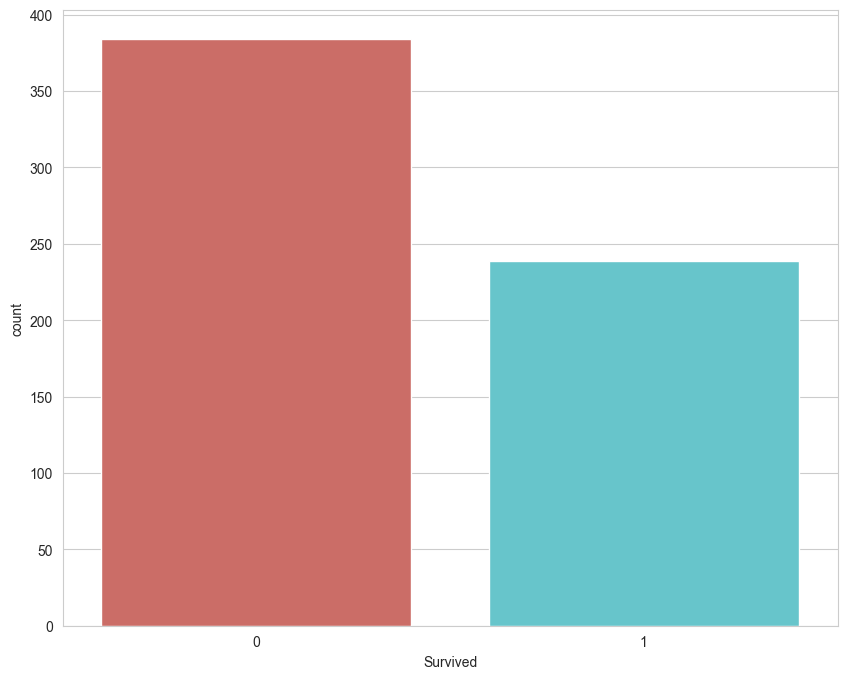

In [9]:
sns.countplot(x='Survived',data=df_train, palette='hls');

In [10]:
# Missing values
df_train.isnull().sum().sort_values(ascending=False)

Cabin          483
Age            124
Embarked         1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Survived         0
dtype: int64

In [11]:
df_train.nunique()

PassengerId    623
Pclass           3
Name           623
Sex              2
Age             74
SibSp            7
Parch            6
Ticket         515
Fare           210
Cabin          110
Embarked         3
Survived         2
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 468 to 745
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          499 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        140 non-null    object 
 10  Embarked     622 non-null    object 
 11  Survived     623 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


Okay, so there are only 623 rows in the titanic data frame. 

Cabin is almost all missing values, so we will drop that variable completely, but what about age? Age seems like a relevant predictor for survival right? We would want to keep the variables, but it has 124 missing values. 

We are going to need to find a way to approximate for those missing values!

#### Dropping missing values: 


So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:

- Survived - Since this variable is our target it is obviously relevant.
- Pclass - Does a passenger's class on the boat affect their chance of survival?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person's chance of survival? Could be...
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person's chance of survival? Possible...
- Fare - Does the fare a person paid effect their chance of survival? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? The passenger ID is a unique number for every passenger and therefore should not contain any useful information for our model. The features name and ticket number might contain helpful information but we would need some proper feature engineering to extract it. For now we will not consider those features for predicting the chance of survival. And as you recall, the cabin variable is almost all missing values, so we will just drop all of these.

In [13]:
df_train_dr = df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1).copy()
df_train_dr.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
468,3,male,NaN,0,0,7.725,Q,0
170,1,male,61.0,0,0,33.500,S,0
150,2,male,51.0,0,0,12.525,S,0
47,3,female,NaN,0,0,7.750,Q,1
822,1,male,38.0,0,0,0.000,S,0


In [14]:
# Display age per class
df_train_dr.groupby(by=['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,128.0,38.308594,14.786156,4.00,25.75,37.0,49.00,71.0
2,117.0,30.693761,13.280036,0.67,23.00,29.0,37.00,70.0
3,254.0,24.584331,12.105888,0.42,18.00,24.0,31.75,70.5


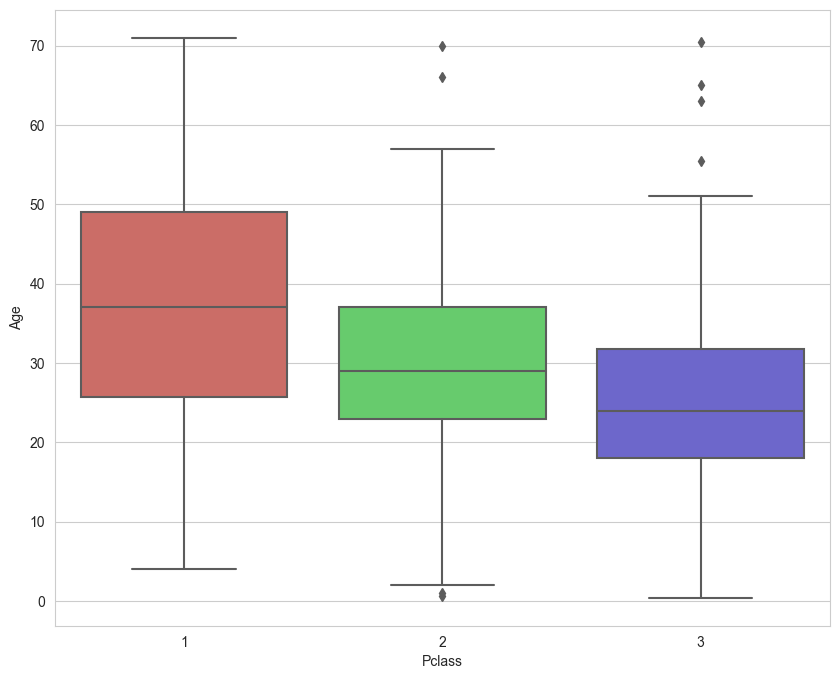

In [15]:
sns.boxplot(x='Pclass', y='Age', data=df_train_dr, palette='hls');

Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the median age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class passengers is 24.

So let's write a function that finds each null value in the Age variable, and for each null, checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

In [16]:
# Check for median age per class
df_train_dr.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [17]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

When we apply the function and check again for null values, we see that there are no more null values in the age variable.

In [18]:
# Replace missing values in age column
df_train_dr['Age'] = df_train_dr[['Age', 'Pclass']].apply(age_approx, axis=1)
df_train_dr.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
Survived    0
dtype: int64

There are 1 null values in the embarked variable. We can drop this 1 records without loosing too much important information from our dataset, so we will do that.

In [19]:
# Drop rows with missing values in Embarkment column
df_train_dr.dropna(inplace=True)
df_train_dr.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

The next thing we need to do is reformat our variables so that they work with the model.
Specifically, we need to reformat the Sex and Embarked variables into numeric variables.

In [20]:
# One-hot-encode sex column
gender = pd.get_dummies(df_train_dr['Sex'],drop_first=True,dtype='int')
gender.head()

,male
468,1
170,1
150,1
47,0
822,1


In [21]:
# One-hot-encode embarked column
embark_location = pd.get_dummies(df_train_dr['Embarked'],drop_first=True,dtype='int')
embark_location.head()

,Q,S
468,1,0
170,0,1
150,0,1
47,1,0
822,0,1


In [22]:
# Drop original columns for sex and embarked
df_train_dr.drop(['Sex', 'Embarked'],axis=1,inplace=True)
df_train_dr.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
468,3,24.0,0,0,7.725,0
170,1,61.0,0,0,33.500,0
150,2,51.0,0,0,12.525,0
47,3,24.0,0,0,7.750,1
822,1,38.0,0,0,0.000,0


In [23]:
# Concatenate one-hot-encoded columns for sex and embarked 
df_train_fe = pd.concat([df_train_dr,gender,embark_location],axis=1)
df_train_fe.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
468,3,24.0,0,0,7.725,0,1,1,0
170,1,61.0,0,0,33.500,0,1,0,1
150,2,51.0,0,0,12.525,0,1,0,1
47,3,24.0,0,0,7.750,1,0,1,0
822,1,38.0,0,0,0.000,0,1,0,1


### Checking for independence between features¶

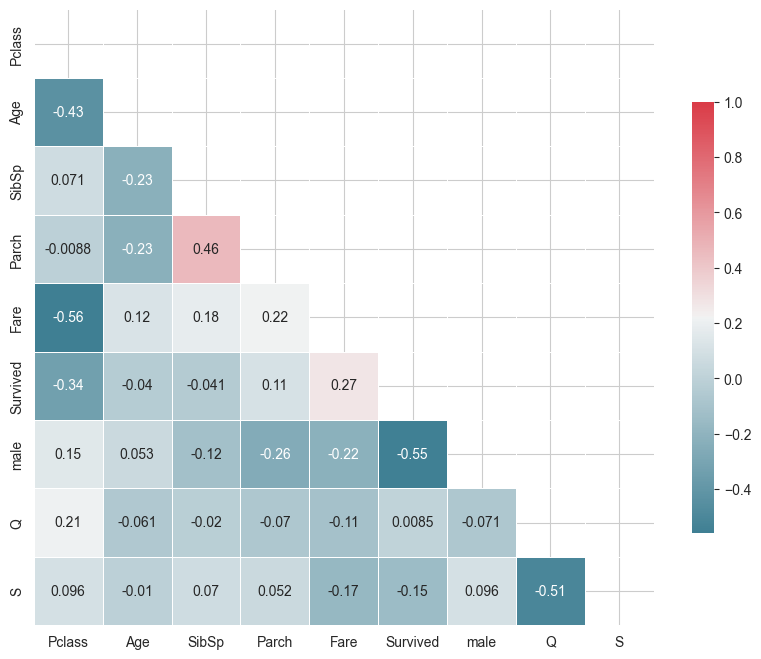

In [24]:
# Compute correlations
correlations = df_train_fe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=.5, cbar_kws={"shrink": .7});

In [25]:
# Fare and Pclass are not independent of each other, so I am going to drop one of these. 
df_train_fe.drop(['Fare'] ,axis=1,inplace=True)
df_train_fe.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
468,3,24.0,0,0,0,1,1,0
170,1,61.0,0,0,0,1,0,1
150,2,51.0,0,0,0,1,0,1
47,3,24.0,0,0,1,0,1,0
822,1,38.0,0,0,0,1,0,1


In [26]:
# Define features and target variable
X_train_fe = df_train_fe.drop("Survived", axis=1)
y_train_fe = df_train_fe['Survived']

## Train Model(s) & Metric

Before we start modeling we have to define a metric. In this particular case it is hard to say that making more mistakes with regard to the false positives is worse than having more false negatives and vice versa. Therefore, we will choose a metric that takes precision and recall into account and evaluate our models using the f1-score.

### Baseline Model

Before we start modeling we need to create a baseline model, which is basically an educated guess. 
From the correlation matrix above we can see that the gender is the feature with the highest (in our case negative) correlation to our target variable. Creating a countplot with the gender and survived feature shows also that the majority of the men did not survive, while most of the women survived. As a simple baseline model we could assume that your chance of survival is only related to your gender and whenever you are a man you will inevitably die while all women will survive. That's if course a very drastic view and not completely correct but we only want to create a "baseline" that our more sophisticated models have to beat. 

In [27]:
df_train_fe.groupby(by=['Survived','male'])[['male']].count()

male
Survived male      
0        0       53
         1      331
1        0      160
         1       78

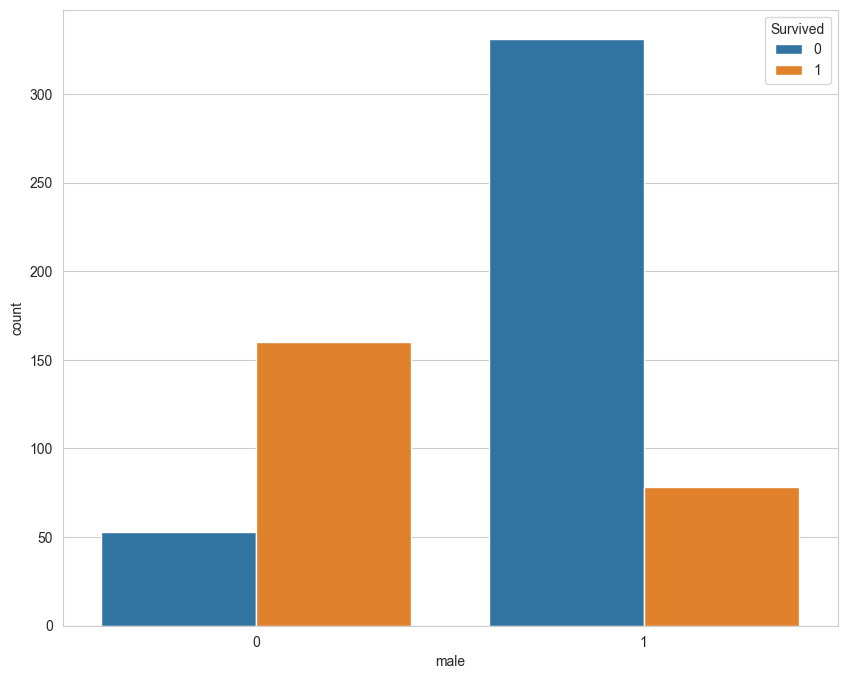

In [28]:
sns.countplot(x="male", data=df_train_fe, hue="Survived");

In [29]:
# Defining baseline model
def baseline_model(df:pd.DataFrame):
    """Edugated guess"""
    y_pred = [0 if x == 1 else 1 for x in df.male]
    return y_pred

## Evaluate Model(s)

Before computing prediction with model(s) for the test set we need to apply the same transformation done on the train set
1. drop columns=['PassengerId','Name','Ticket','Cabin']
2. replace missing values in age column with median value from age column in train set
3. drop observations where Embarked column contains nan
4. One-hot-encode sex column
5. One-Hot-encode embarked column
6. Drop original columns for sex and embarked
7. Concatenate one-hot-encoded columns for sex and embarked 

In [30]:
# Combine X_test and y_test
df_test = pd.concat([X_test,y_test], axis=1, ignore_index=False)

In [31]:
# 1. Drop columns=['PassengerId','Name','Ticket','Cabin','Fare']
df_test_dr = df_test.drop(columns=['PassengerId','Name','Ticket','Cabin','Fare'],axis=1).copy()

In [32]:
# 2. Replace missing values in age column with median value from age column in train set
df_test_dr['Age'] = df_test_dr[['Age', 'Pclass']].apply(age_approx, axis=1)

In [33]:
# 3. drop observations where Embarked column contains nan
df_test_dre = df_test_dr.loc[df_test_dr["Embarked"].notnull(),:].copy()

In [34]:
# 4. One-hot-encode sex column
gender_test = pd.get_dummies(df_test_dre['Sex'],drop_first=True,dtype='int')

In [35]:
# 5. One-Hot-encode embarked column
embarked_test = pd.get_dummies(df_test_dre['Embarked'],drop_first=True,dtype='int')

In [36]:
# 6. Drop original columns for sex and embarked
df_test_dre.drop(['Embarked','Sex'],axis=1,inplace=True)

In [37]:
# 7. Concatenate one-hot-encoded columns for sex and embarked 
df_test_fe = pd.concat([df_test_dre,gender_test,embarked_test],axis=1)
df_test_fe.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
389,2,17.0,0,0,1,0,0,0
441,3,20.0,0,0,0,1,0,1
643,3,24.0,0,0,1,1,0,1
633,1,37.0,0,0,0,1,0,1
638,3,41.0,0,5,0,0,0,1


In [38]:
# Define features and target variable
X_test_fe = df_test_fe.drop("Survived", axis=1).copy()
y_test_fe = df_test_fe['Survived']

In [39]:
# Compute predictions with baseline model for test set
y_pred_bl_test = baseline_model(X_test_fe)

In [40]:
# Plot confusion matrix for baseline model
cm_test = confusion_matrix(y_test_fe, y_pred_bl_test)
cm_test

array([[137,  28],
       [ 31,  71]])

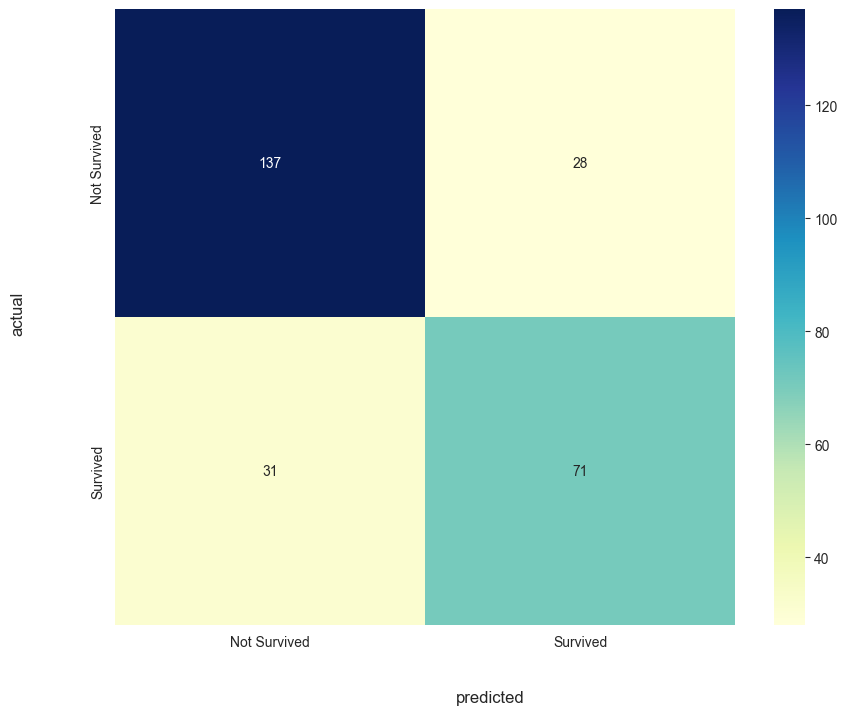

In [41]:
fig, ax = plt.subplots()
sns.heatmap(cm_test, cmap="YlGnBu", annot=True, fmt='d',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            ax=ax)

fig.supxlabel("predicted")
fig.supylabel("actual");

In [42]:
# Calculate f1-score for baseline model
print("F1-score test: ", f1_score(y_test_fe, y_pred_bl_test).round(2))

F1-score test:  0.71


Our baseline model manages to 
+ 28 out of the 165 Not Survived observations get misclassified as Survived, and the remaining 137 are correctly classified
+ 31 out of the 102 Survived observations get misclassified as Not Survived, and the remaining 71 are correctly classified 

The computed f1-score is 0.71. 

Let's see if we can improve this with a logistic regression. 

## Logistic Regression

In [43]:
# Instantiate model and fit it on train data
logreg = LogisticRegression(max_iter=1000,class_weight='balanced')
logreg.fit(X_train_fe, y_train_fe)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [44]:
# Make predictions for test set
y_pred_log_test = logreg.predict(X_test_fe)

In [45]:
cm_log_test = confusion_matrix(y_test_fe, y_pred_log_test)
cm_log_test

array([[124,  41],
       [ 18,  84]])

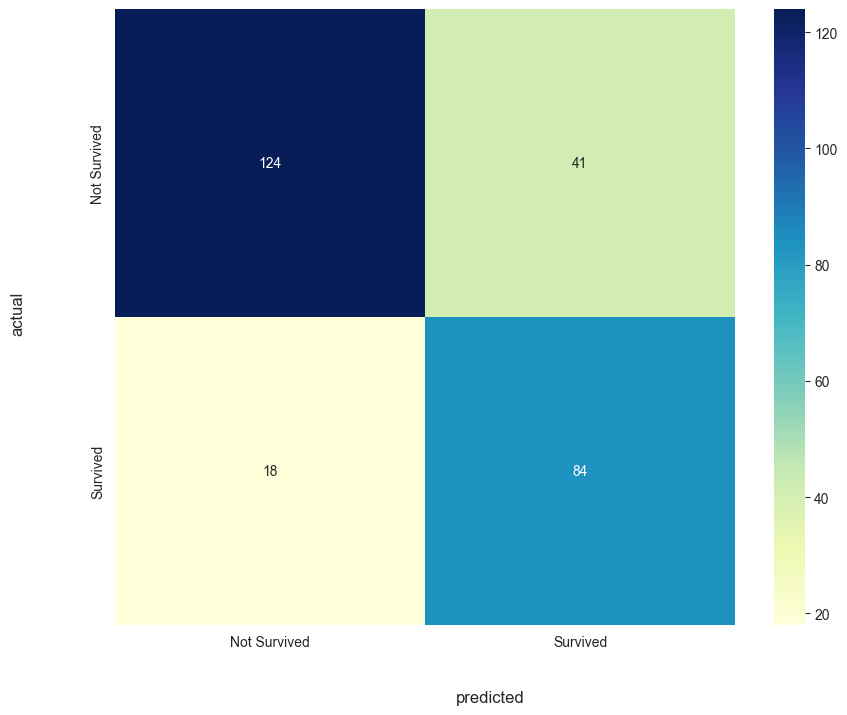

In [46]:
fig, ax = plt.subplots()
sns.heatmap(cm_log_test, cmap="YlGnBu", annot=True, fmt='d',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            ax=ax)

fig.supxlabel("predicted")
fig.supylabel("actual");

In [47]:
# Calculate f1-score for logistic regression model
print("F1-score: ", f1_score(y_test_fe, y_pred_log_test).round(2))

F1-score:  0.74


The confusion matrix shows that 124 and 84 are the number of correct predictions. 41 instances from class 0 (Not Survived) where incorrectly classified as belonging to class 1 (Survived). With regard to the false negatives, the instances that actually belong to class 1 but where classified as being class 0, our model improved quite a bit compared to the baseline. 

Also the f1-score is with 0.74 slightly higher compared to the baseline model, but I would probably not call it a huge improvement. Seems that our choice of a baseline model was not that bad...


In [48]:
# Print classification report for more information
print(classification_report(y_test_fe, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       165
           1       0.67      0.82      0.74       102

    accuracy                           0.78       267
   macro avg       0.77      0.79      0.77       267
weighted avg       0.80      0.78      0.78       267



**Let us learn about Classification Report: https://muthu.co/understanding-the-classification-report-in-sklearn/**